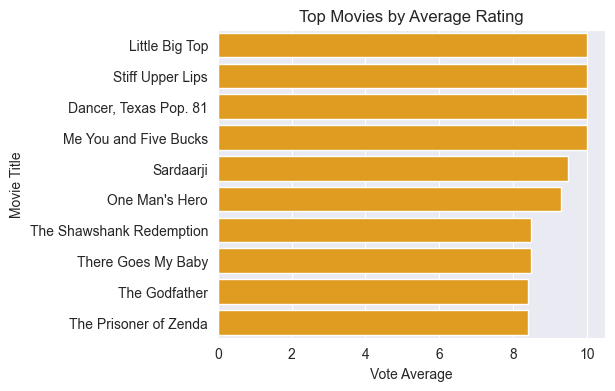

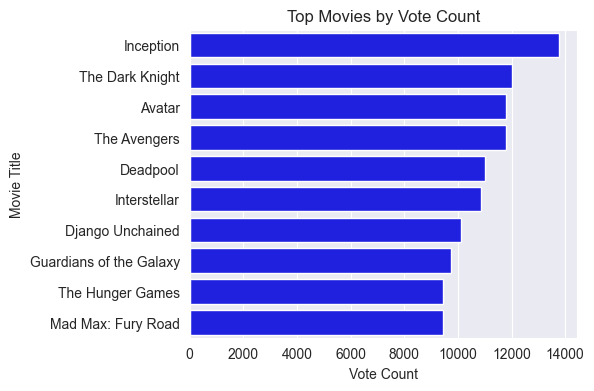

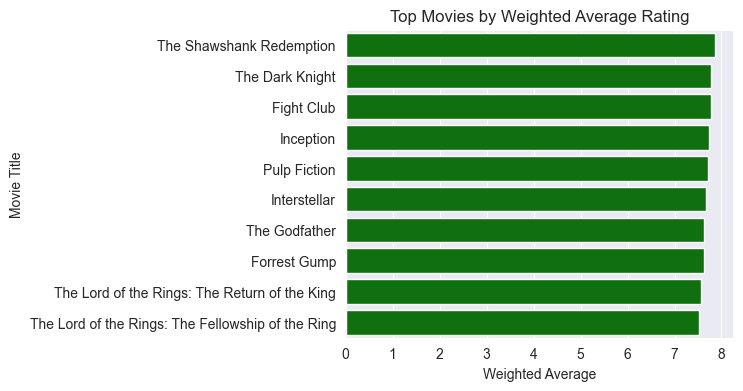

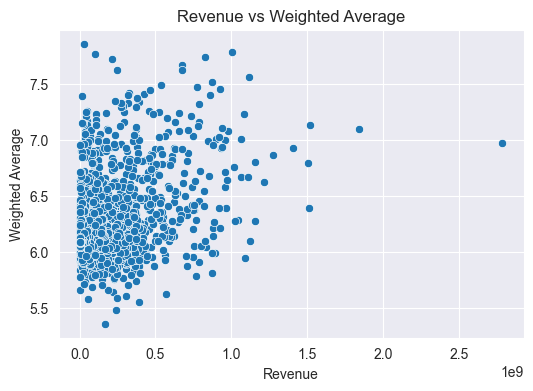

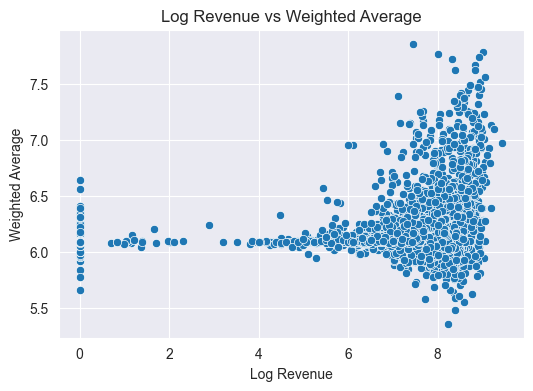

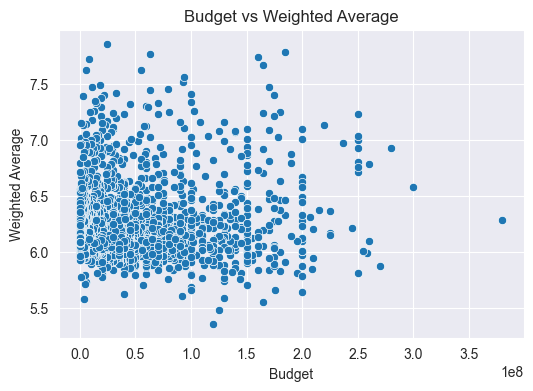

In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

class MovieAnalysis:
    def __init__(self, file_path):
        self.movies = pd.read_csv(file_path)
        self.preprocess_data()

    def preprocess_data(self):
        self.movies = self.movies[['budget', 'id', 'title', 'release_date', 'revenue', 'vote_count', 'vote_average']]
        self.movies['log_revenue'] = self.movies['revenue'].map(lambda x: math.log(max(x, 1), 10))

    def top_movies(self, by_column, top_n=10):
        return self.movies.sort_values(by=by_column, ascending=False).head(top_n)

    def calculate_weighted_average(self, min_votes):
        V = self.movies['vote_count']
        R = self.movies['vote_average']
        C = self.movies['vote_average'].mean()
        m = min_votes
        self.movies['weighted_average'] = (R * V + C * m) / (V + m)

    def visualize_top_movies(self, metric, title, color='orange', top_n=10):
        top_movies = self.top_movies(metric, top_n)
        plt.figure(figsize=(5, 4))
        sns.barplot(data=top_movies, x=metric, y='title', color=color)
        plt.xlabel(metric.replace('_', ' ').title())
        plt.ylabel('Movie Title')
        plt.title(title)
       # plt.show()

    def visualize_scatter(self, x_col, y_col):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=self.movies, x=x_col, y=y_col)
        plt.xlabel(x_col.replace('_', ' ').title())
        plt.ylabel(y_col.replace('_', ' ').title())
        plt.title(f'{x_col.replace("_", " ").title()} vs {y_col.replace("_", " ").title()}')
       # plt.show()

    def run_analysis(self):
        self.calculate_weighted_average(3000)
        self.visualize_top_movies('vote_average', 'Top Movies by Average Rating', color='orange')
        self.visualize_top_movies('vote_count', 'Top Movies by Vote Count', color='blue')
        self.visualize_top_movies('weighted_average', 'Top Movies by Weighted Average Rating', color='green')

        # Scatter Plots
        self.visualize_scatter('revenue', 'weighted_average')
        self.visualize_scatter('log_revenue', 'weighted_average')
        self.visualize_scatter('budget', 'weighted_average')


if __name__ == "__main__":
    file_path = "tmdb_5000_movies.csv"
    analyzer = MovieAnalysis(file_path)
    analyzer.run_analysis()
